# Carprice Dataset Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


path='https://raw.githubusercontent.com/LeoFernanndes/datasets/master/automobile_uci_1985.csv'
df = pd.read_csv(path)
df_raw = df.copy()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(path)
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Preço: 13207.129353233831 +/- 15894.132683878543


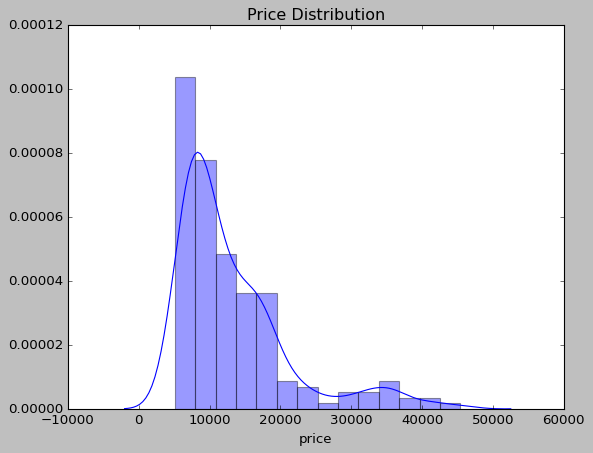

In [ ]:
print("Preço: {} +/- {}".format(df["price"].mean(), 2 * df["price"].std()))
plt.style.use("classic")
plt.title("Price Distribution")
sns.distplot(df["price"])
plt.show()

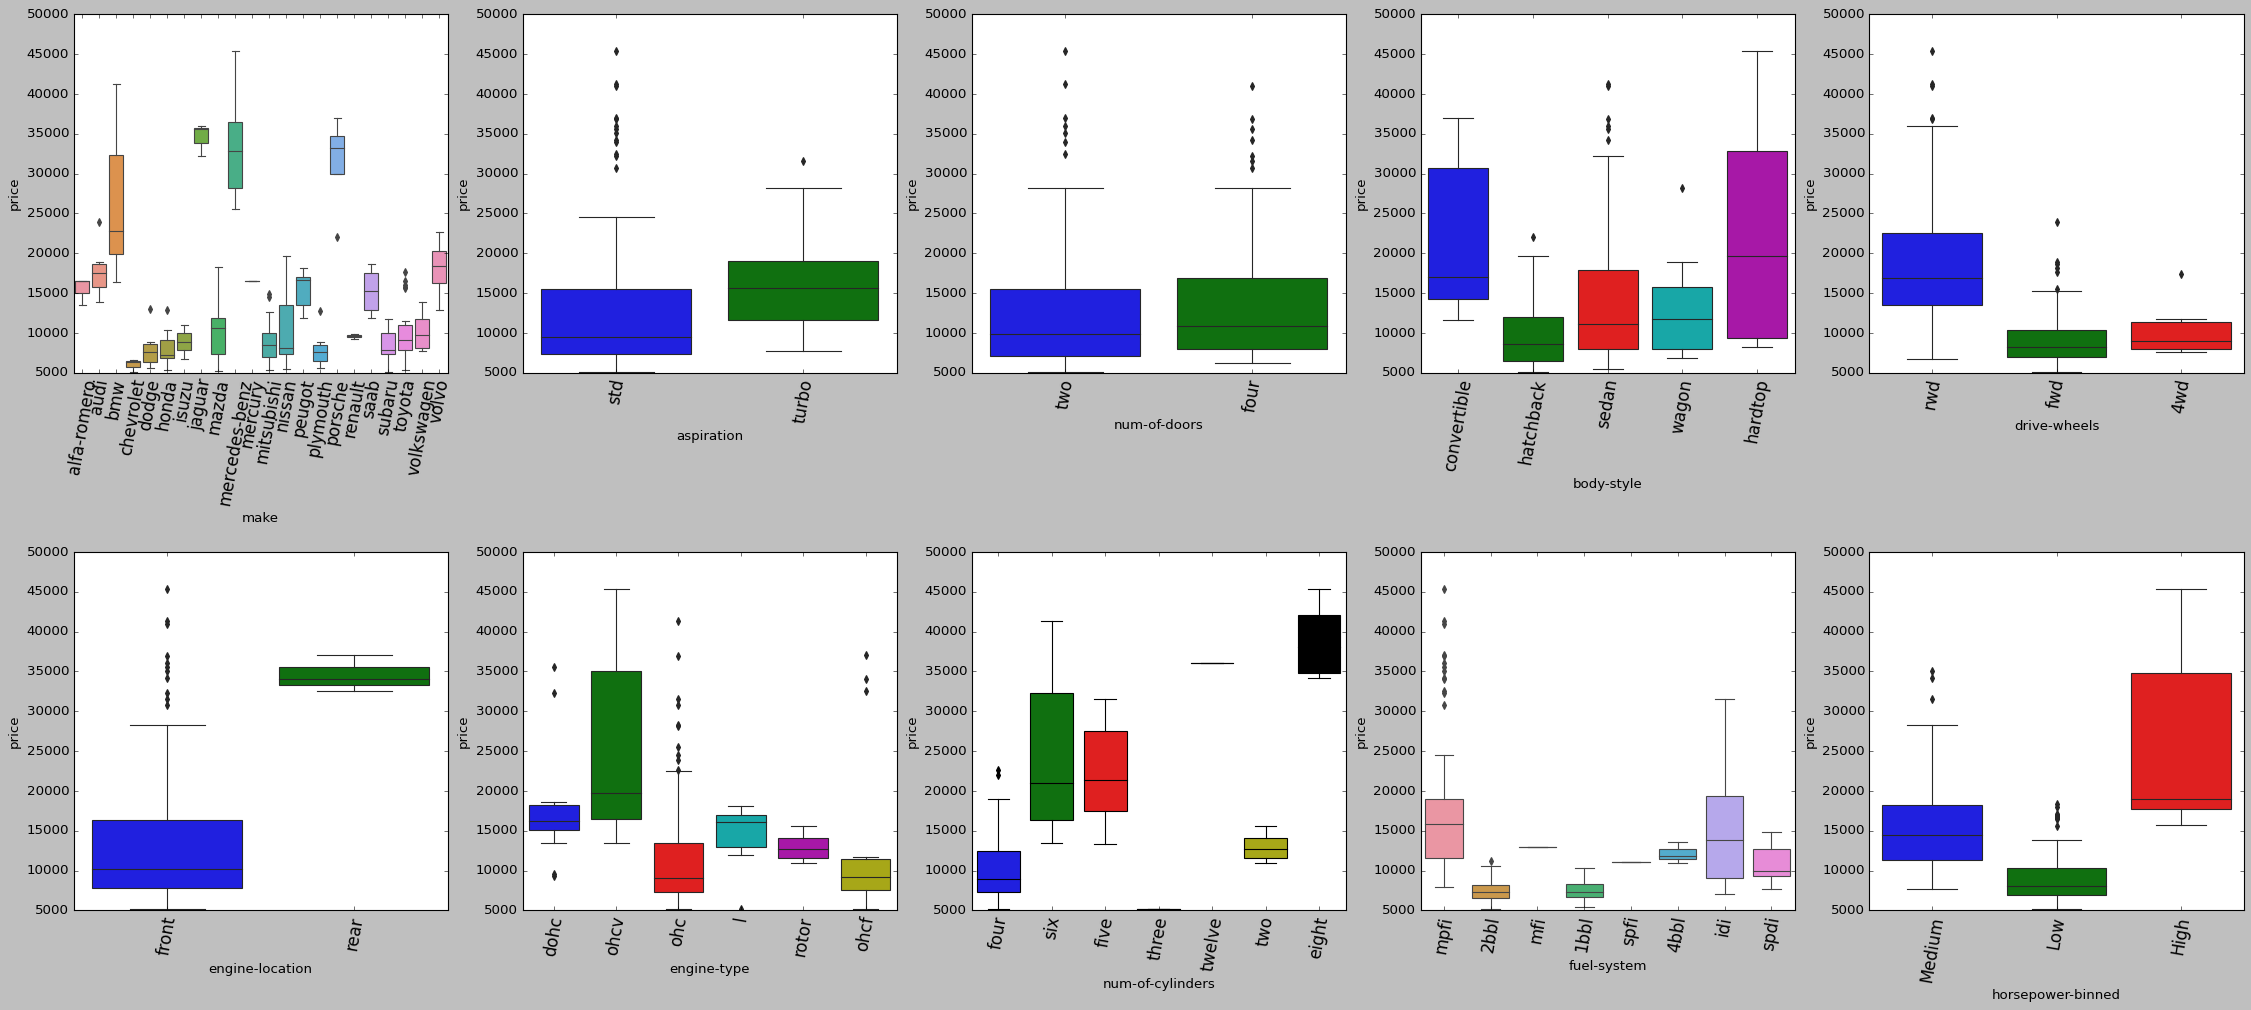

In [ ]:
features = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned']
       
nrows=2
ncols=5
font_size=15

plt.figure(figsize=(7 * ncols, 7 * nrows))
plt.subplots_adjust(hspace=0.5)
for idx in range(len(features)):
  plt.subplot(nrows, ncols, idx+1)
  plot2 = sns.boxplot(x=features[idx], y="price", data=df)
  plt.xticks(rotation=80, fontsize=font_size)

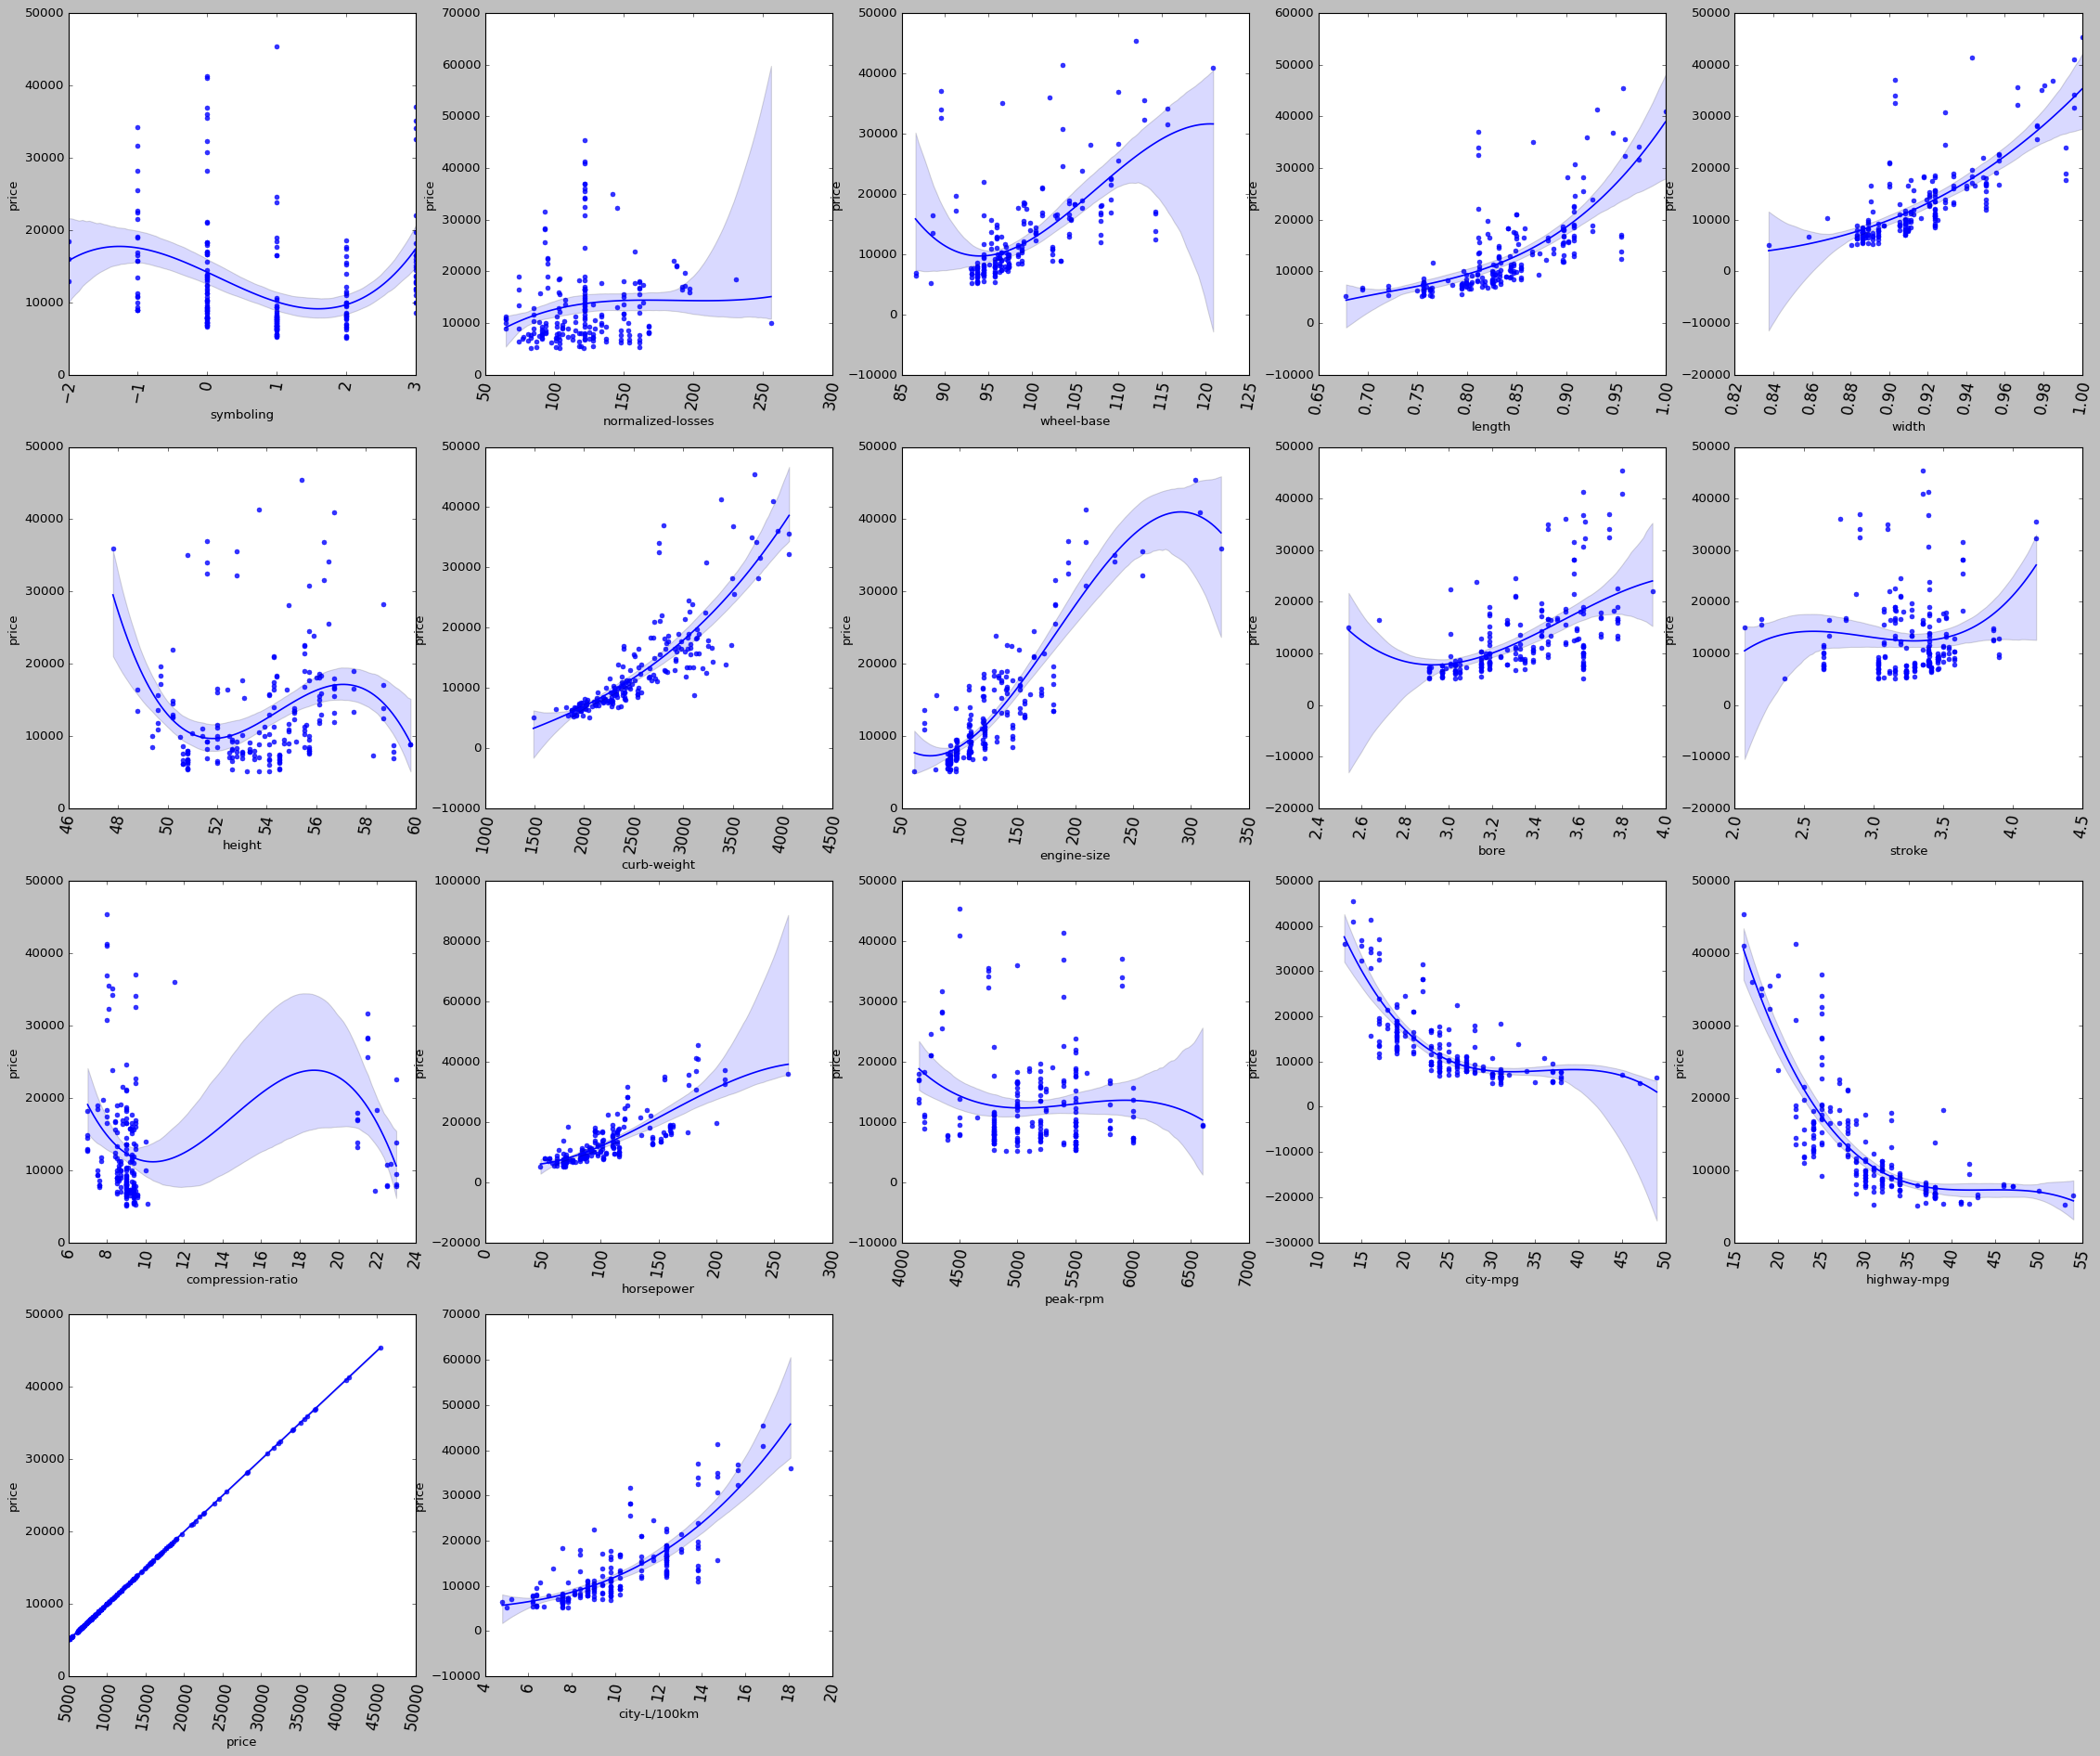

In [ ]:
features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km']

nrows=4
ncols=5
font_size=15

plt.figure(figsize=(7 * ncols, 7 * nrows))

for idx in range(len(features)):
  plt.subplot(nrows, ncols, idx+1)
  plot2 = sns.regplot(x=features[idx], y="price", order=3, data=df)
  plt.xticks(rotation=80, fontsize=font_size)

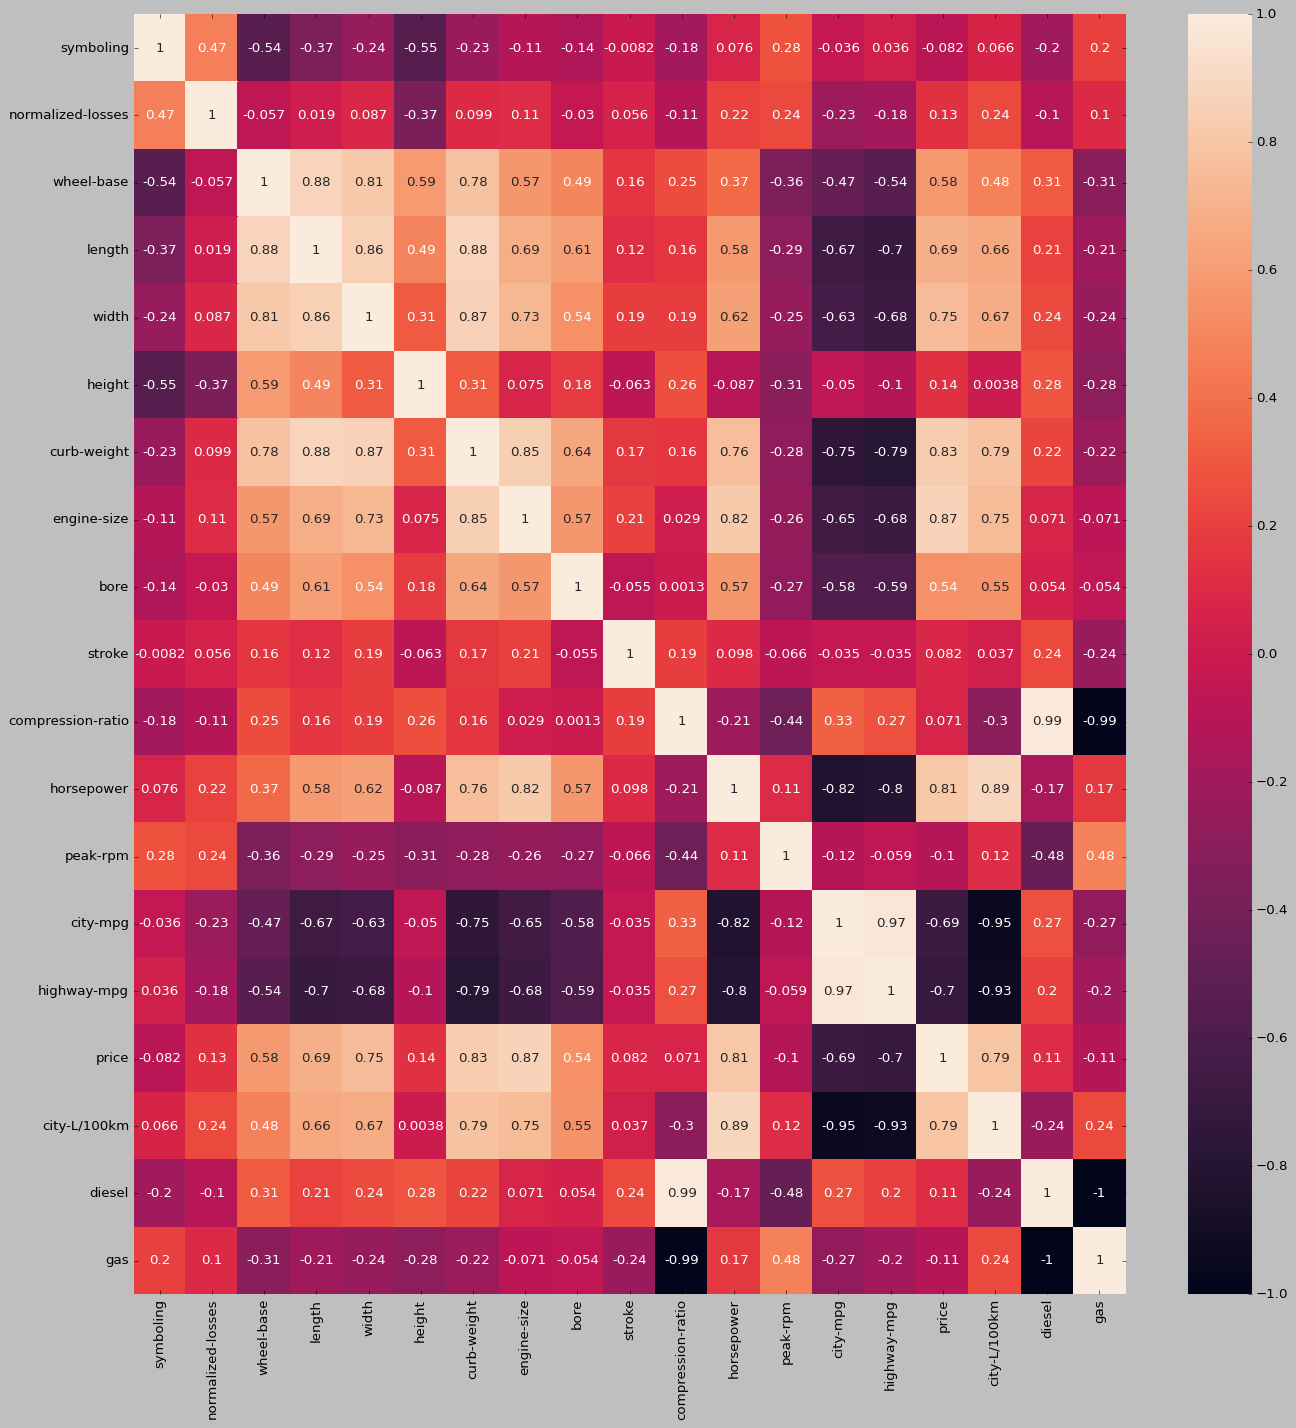

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
limit = 0
correlated_features = df.corr()["price"].loc[(df.corr()["price"] > limit) | (df.corr()["price"] < -limit)]
correlated_features

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

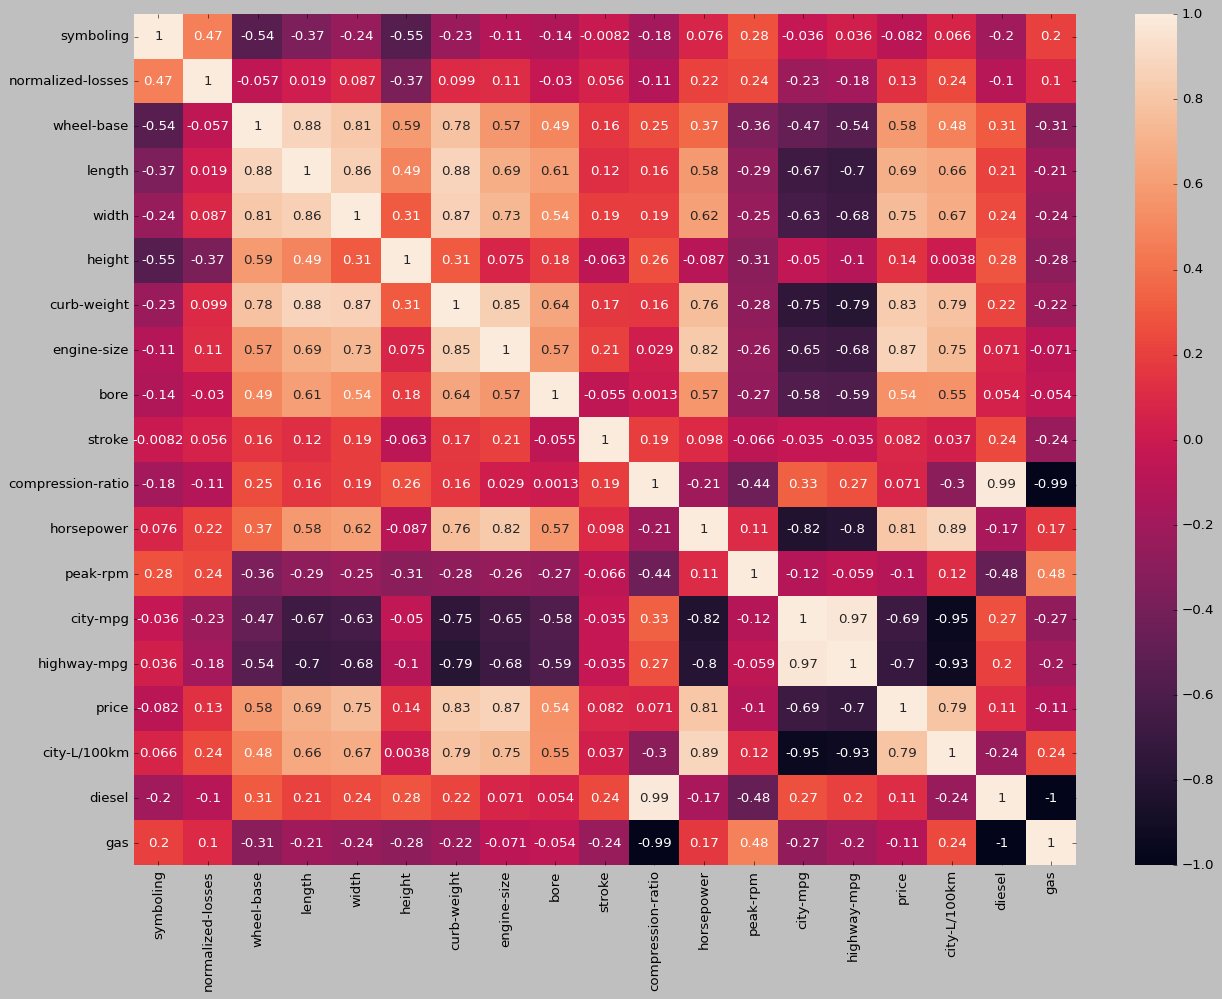

In [ ]:
# correlation matrix for the selected features
corr = df[correlated_features.index].corr()
plt.figure(figsize=(len(correlated_features.index) * 1, len(correlated_features.index) * 0.7))
sns.heatmap(corr, annot=True)
plt.show()

# Data Preprocessing

In [ ]:
correlated_features_ = list(correlated_features.index)

categorical_features_ = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned']

for feature in  categorical_features_:
  if feature not in correlated_features_:
    correlated_features_.append(feature)

if "price" not in correlated_features_:
  correlated_features.append("price")

df = df[correlated_features_]
df.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
horsepower-binned    1
dtype: int64

2 clusters - Silh 0.5991343981803627 - DaviesBouldin 0.5401886937052217 - cal 493.35222533651694
3 clusters - Silh 0.5015448784034591 - DaviesBouldin 0.6305741322449847 - cal 509.09856693008027
4 clusters - Silh 0.4998677258551721 - DaviesBouldin 0.6096360352918739 - cal 630.5732928673492
5 clusters - Silh 0.5149674020599286 - DaviesBouldin 0.5505449080111833 - cal 748.341886970522
6 clusters - Silh 0.5224385389308909 - DaviesBouldin 0.5832102485551761 - cal 904.4018386077281
7 clusters - Silh 0.49467898696470775 - DaviesBouldin 0.6477445836769604 - cal 897.6927932590329



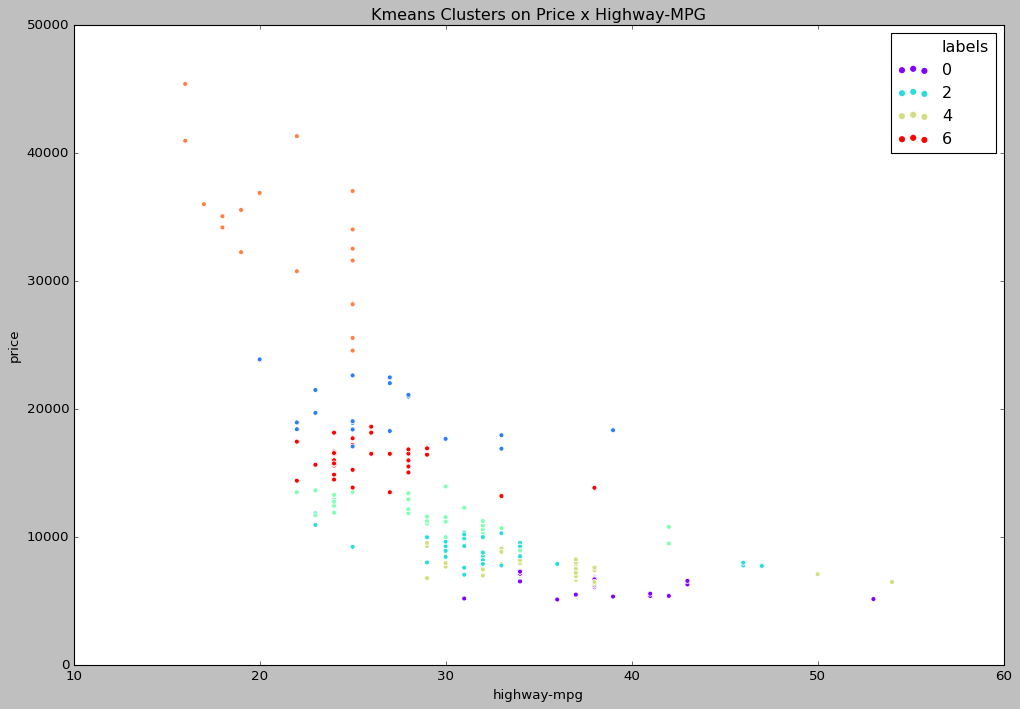

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


df.fillna(df.mean(), inplace=True)

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == "object":
    df[column] = le.fit_transform(df[column].astype("str"))

norm = Normalizer()
values = norm.fit_transform(df.values)

n_clusters_ = 7

kmeans = KMeans(n_clusters=n_clusters_, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
df["labels"] = kmeans.labels_

plt.figure(figsize=(15, 10))
for n_clusters in np.arange(2, n_clusters_+1):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  y_pred = kmeans.fit_predict(values)

  labels = kmeans.labels_
  silhouette = silhouette_score(values, labels, metric="euclidean")
  dbs = davies_bouldin_score(values, labels)
  calinski = calinski_harabasz_score(values, labels)
  print("{} clusters - Silh {} - DaviesBouldin {} - cal {}".format(n_clusters, silhouette, dbs, calinski))

print("")

plt.title("Kmeans Clusters on Price x Highway-MPG")
sns.scatterplot(x="highway-mpg", y="price", data=df, hue="labels", palette="rainbow")
plt.show()

In [ ]:
df = df.sample(frac=1)

X_val = df.drop(columns=["price"]).iloc[0:150]
y_val = df["price"].iloc[0:150]

X_test = df.drop(columns=["price"]).iloc[150:]
y_test = df["price"].iloc[150:]

# Pretty much the most simple regressor we can figure out

 naive regressor absolute Error: 6334.81010464917 +/- 12513.719033346915
 naive regressor percentual Error: 0.2894503830907787 +/- 1.3940643748077979



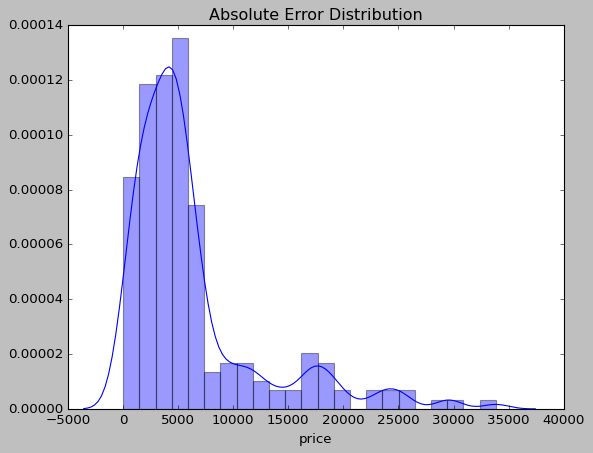

In [ ]:
groupby = df.groupby(by=["engine-type"]).mean()

pred = []
for row in range(df.shape[0]):
  for line in range(groupby.shape[0]):
    if df["engine-type"][row] == groupby.iloc[line].name:
      pred.append(groupby.iloc[line].price)

error = np.sqrt((pred - df["price"])**2)
error2 = (pred - df["price"]) / df["price"]
print(" {} absolute Error: {} +/- {}".format("naive regressor", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("naive regressor", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

error_naive_regressor = error

# Linear Regression

 LinearRegression absolute Error: 2551.9776934212964 +/- 5095.09659427017
 LinearRegression percentual Error: 0.023622362550234862 +/- 0.44032922510264905



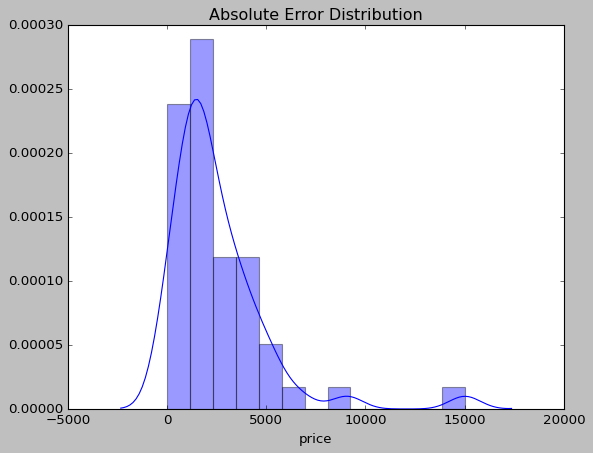

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_val, y_val)
pred = model.predict(X_test)
error = np.sqrt((pred - y_test)**2)
error2 = (pred - y_test) / y_test
print(" {} absolute Error: {} +/- {}".format(str(model).split("(")[0], error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format(str(model).split("(")[0], error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

error_linear_regressor = error

# Trying a little more generalization on the search

 RandomForestRegressor absolute Error: 1084.1258846872083 +/- 2794.4076321453767
 RandomForestRegressor percentual Error: 0.006995644133955298 +/- 0.17853597951800976

 AdaBoostRegressor absolute Error: 1661.8058491894838 +/- 2846.123325149941
 AdaBoostRegressor percentual Error: 0.07863371233591411 +/- 0.32446614944384433

 BaggingRegressor absolute Error: 1017.9950980392158 +/- 2494.576381051894
 BaggingRegressor percentual Error: 0.0015211880349943092 +/- 0.16589325324316306



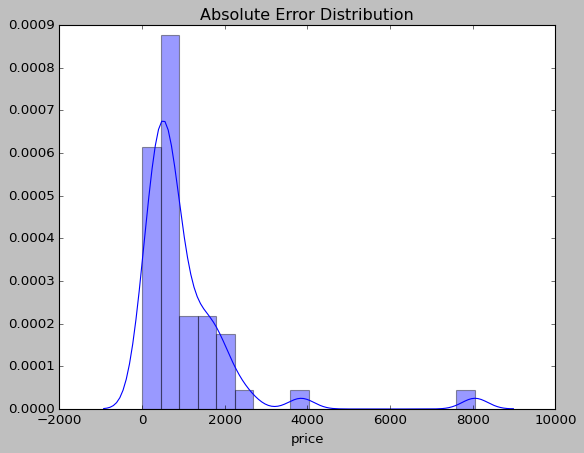

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

models = [
          RandomForestRegressor(),
          AdaBoostRegressor(),
          BaggingRegressor()
          ]

for model in models:
  model = model
  model.fit(X_val, y_val)
  pred = model.predict(X_test)
  error = np.sqrt((pred - y_test)**2)
  error2 = (pred - y_test) / y_test
  print(" {} absolute Error: {} +/- {}".format(str(model).split("(")[0], error.mean(), 2 * error.std()))
  print(" {} percentual Error: {} +/- {}".format(str(model).split("(")[0], error2.mean(), 2 * error2.std()))
  print("") 


plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

error_ensemble_regressor = error

# Randomly looking through the best ensemble parameters grid combinations

 Optimized Ensemble absolute Error: 1085.0311426777369 +/- 3001.0393290244388
 Optimized Ensemble percentual Error: 0.0025909738143953 +/- 0.1726841923826937



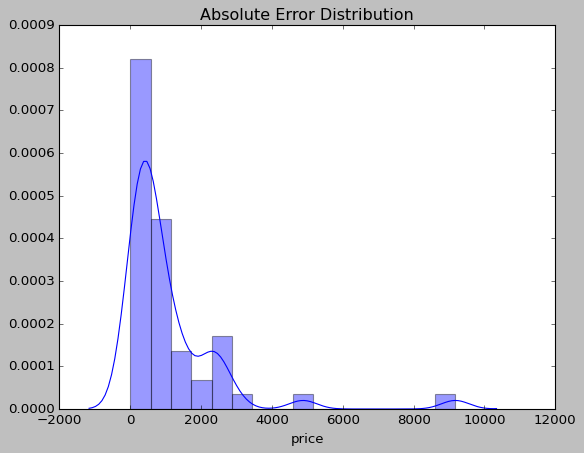

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor()
fold = KFold(n_splits=5, shuffle=True)

param = {"n_estimators": np.arange(100, 1000, 100),
         "max_depth": np.arange(1, 17),
         "criterion": ["mse", "mae"]}

search = RandomizedSearchCV(model, param_distributions=param, scoring="neg_mean_absolute_error", cv=fold, n_jobs=-1)
search.fit(X_val, y_val)


model = search.best_estimator_
model.fit(X_val, y_val)
pred = model.predict(X_test)
error = np.sqrt((pred - y_test)**2)
error2 = (pred - y_test) / y_test
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

error_optimized_ensemble_regressor = error

# The Neural Network approach using Keras

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor


model = Sequential()
model.add(Dense(1024, input_dim=X_val.shape[1], kernel_initializer="normal", activation="relu"))
model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mean_absolute_error"])
resultados = model.fit(X_val, y_val, epochs=100, validation_split=0.3)

pred_test_ = model.predict(X_test)
pred_test = [item[0] for item in pred_test_]
error = np.sqrt((pred_test - y_test)**2)
eror2 = (pred_test - y_test) / y_test

error_nn_regressor = error
error_nn_regressor_percent = error2

Using TensorFlow backend.


Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s 758us/step - loss: 132727234.4571 - mean_absolute_error: 9377.7764 - val_loss: 101254245.3333 - val_mean_absolute_error: 6785.5630
Epoch 2/100
105/105 [==============================] - 0s 114us/step - loss: 46332311.7714 - mean_absolute_error: 5421.8701 - val_loss: 79153015.2889 - val_mean_absolute_error: 7697.6113
Epoch 3/100
105/105 [==============================] - 0s 147us/step - loss: 50090072.3429 - mean_absolute_error: 5908.8931 - val_loss: 85408570.1333 - val_mean_absolute_error: 6690.4277
Epoch 4/100
105/105 [==============================] - 0s 144us/step - loss: 38052994.4762 - mean_absolute_error: 4130.7725 - val_loss: 111337617.7778 - val_mean_absolute_error: 6764.2681
Epoch 5/100
105/105 [==============================] - 0s 115us/step - loss: 42566569.4667 - mean_absolute_error: 4021.7734 - val_loss: 96055750.0444 - val_mean_absolute_error: 6505.9834
Epoch 6/100
105/1

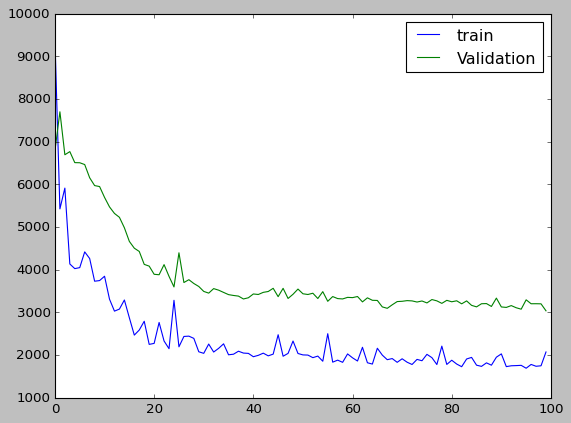


Absolute error test: 2602.2342122395835 +/- 7961.417574443274
Percentual error test: 0.0025909738143953 +/- 0.1726841923826937



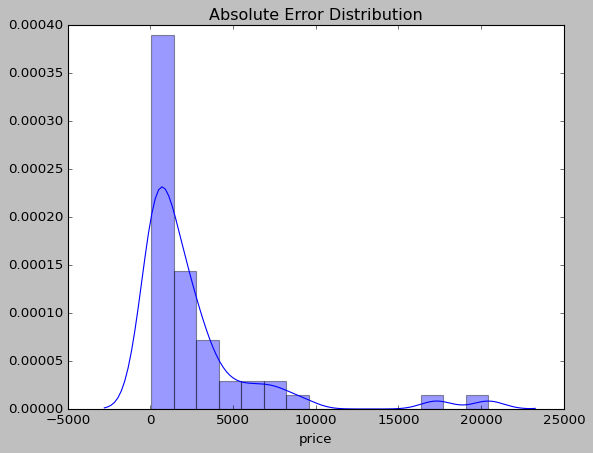

In [ ]:
plt.plot(resultados.history["mean_absolute_error"], label="train")
plt.plot(resultados.history["val_mean_absolute_error"], label="Validation")
plt.legend()
plt.show()

print("")
print("Absolute error test: {} +/- {}".format(error_nn_regressor.mean(), 2 * error_nn_regressor.std()))
print("Percentual error test: {} +/- {}".format(error_nn_regressor_percent.mean(), 2 * error_nn_regressor_percent.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

# Exploring kmeans possibilities

Cluster 0: Absolute Error 410.9999999999999 +/- 483.35352486559964
Cluster 1: Absolute Error 2219.4 +/- 873.1877003256533
Cluster 2: Absolute Error 369.27499999999986 +/- 389.6153084408113
Cluster 3: Absolute Error 735.9181818181819 +/- 967.816870355882
Cluster 4: Absolute Error 337.375 +/- 375.278398880973
Cluster 5: Absolute Error 3651.8600000000006 +/- 6606.9407165495295
Cluster 6: Absolute Error 758.5545454545455 +/- 1307.449536658716

 Optimized Ensemble absolute Error: 967.8313725490198 +/- 2835.8558616375967
 Optimized Ensemble percentual Error: 0.003109224891108374 +/- 0.15567094285349742



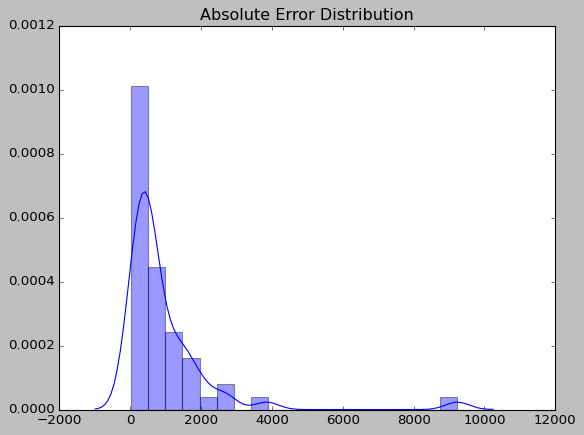

In [ ]:
results = pd.DataFrame(columns=X_val.columns)
num_clus = []
mean = []
dispersion = []

reg = BaggingRegressor()

for cluster in range(n_clusters_):

  parcial = pd.DataFrame(columns=X_val.columns)

  X_val_ = X_val.loc[X_val["labels"] == cluster]
  y_val_ = df.loc[X_val_.index]["price"]
  
  X_test_ = X_test.loc[X_test["labels"] == cluster]
  y_test_ = df.loc[X_test_.index]["price"]

  if X_test_.shape[0] > 0:
    reg.fit(X_val_, y_val_)
    parcial = X_test_.copy()
    parcial["pred"] = reg.predict(X_test_)
    parcial["price"] = y_test_

    results = results.append(parcial)

    error_ = np.sqrt((parcial["pred"] - parcial["price"])**2)

    print("Cluster {}: Absolute Error {} +/- {}".format(cluster, error_.mean(), 2 * error_.std()))
    
    num_clus.append(cluster)
    mean.append(error_.mean())
    dispersion.append(2 * error_.std())

cluster_results = pd.DataFrame({"Cluster": num_clus,
                                "Mean": mean,
                                "Dispersion": dispersion})
  
error = np.sqrt((results["pred"] - results["price"])**2)
error2 = (results["pred"] - results["price"]) / results["price"]
print("")
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

error_kmeansBagging_classifier = error

# Kmeans on clusters whose error variance is sufficiently low

   Cluster         Mean   Dispersion
6        6   758.554545  1307.449537
3        3   735.918182   967.816870
1        1  2219.400000   873.187700
0        0   411.000000   483.353525
2        2   369.275000   389.615308
4        4   337.375000   375.278399

Ratio of unlabeled data: 0.14285714285714285

 Optimized Ensemble absolute Error: 676.0891304347825 +/- 1227.066753760192
 Optimized Ensemble percentual Error: 0.01208255785348793 +/- 0.14211620847705464



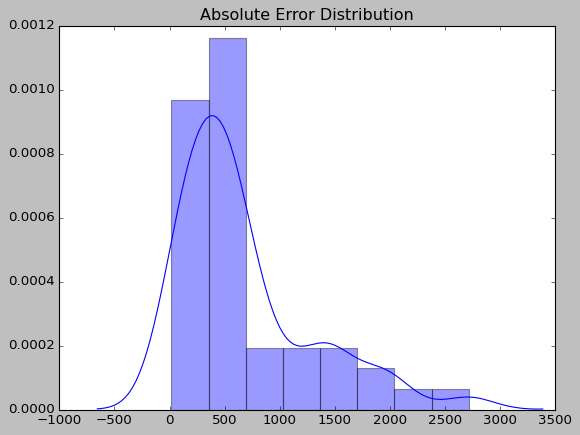

In [ ]:
# filtering cluster whose variance is low
dispersion_treshold = 3000
cluster_results = cluster_results.sort_values(by=["Dispersion"], ascending=False)
cluster_results_ = cluster_results.loc[cluster_results["Dispersion"] < dispersion_treshold]
low_variance = cluster_results_["Cluster"].values

filtered_results = results[results["labels"].isin(low_variance)]

error = np.sqrt((filtered_results["pred"] - filtered_results["price"])**2)
error2 = (filtered_results["pred"] - filtered_results["price"]) / filtered_results["price"]

print(cluster_results_)
print("")
print("Ratio of unlabeled data: {}".format((cluster_results.shape[0] - cluster_results_.shape[0]) / cluster_results.shape[0]))
print("")
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error)
plt.show()

error_filtered_kmeansBagging_classifier = error

   Cluster     Mean   Dispersion
5        5  3651.86  6606.940717



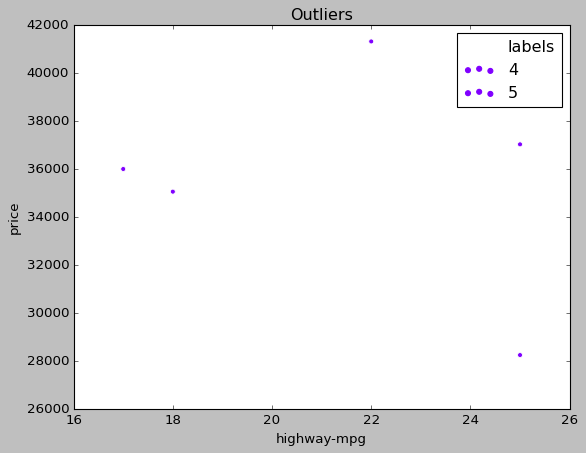

In [ ]:
high_variance = [cluster for cluster in cluster_results["Cluster"].values if cluster not in low_variance]
outliers = results[results["labels"].isin(high_variance)]

cluster_results__ = cluster_results.loc[cluster_results["Dispersion"] > dispersion_treshold]
print(cluster_results__)
print("")

plt.title("Outliers")
sns.scatterplot(x="highway-mpg", y="price", data=outliers, hue="labels", palette="rainbow")
plt.show()

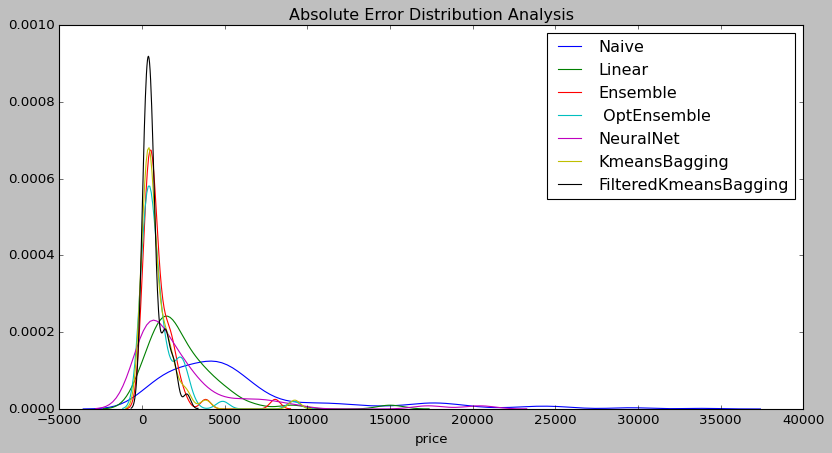


 Naive regressor absolute Error: 6334.81010464917 +/- 12513.719033346915
 Linear regressor absolute Error: 2551.9776934212964 +/- 5095.09659427017
 Ensemble regressor absolute Error: 1017.9950980392158 +/- 2494.576381051894
 Optimized Ensemble regressor absolute Error: 1085.0311426777369 +/- 3001.0393290244388
 NeuralNet regressor absolute error: 2602.2342122395835 +/- 7961.417574443274
 Kmeans Bagging regressor absolute error: 967.8313725490198 +/- 2835.8558616375967
 Filtered Kmeans Bagging regressor absolute error: 676.0891304347825 +/- 1227.066753760192


In [ ]:
tamanho = 6
#plt.style.available # to see available background style for plt
plt.style.use("classic")
plt.figure(figsize=(2 * tamanho, 1 * tamanho))
sns.distplot(error_naive_regressor, hist=False, label="Naive")
sns.distplot(error_linear_regressor, hist=False, label="Linear")
sns.distplot(error_ensemble_regressor, hist=False, label="Ensemble")
sns.distplot(error_optimized_ensemble_regressor, hist=False, label=" OptEnsemble")
sns.distplot(error_nn_regressor, hist=False, label="NeuralNet")
sns.distplot(error_kmeansBagging_classifier, hist=False, label="KmeansBagging")
sns.distplot(error_filtered_kmeansBagging_classifier, hist=False, label="FilteredKmeansBagging")
plt.title("Absolute Error Distribution Analysis")
plt.legend()
plt.show()

print("")
print(" {} absolute Error: {} +/- {}".format("Naive regressor", error_naive_regressor.mean(), 2 * error_naive_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Linear regressor", error_linear_regressor.mean(), 2 * error_linear_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Ensemble regressor", error_ensemble_regressor.mean(), 2 * error_ensemble_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble regressor", error_optimized_ensemble_regressor.mean(), 2 * error_optimized_ensemble_regressor.std()))
print(" {} absolute error: {} +/- {}".format("NeuralNet regressor", error_nn_regressor.mean(), 2 * error_nn_regressor.std()))
print(" {} absolute error: {} +/- {}".format("Kmeans Bagging regressor", error_kmeansBagging_classifier.mean(), 2 * error_kmeansBagging_classifier.std()))
print(" {} absolute error: {} +/- {}".format("Filtered Kmeans Bagging regressor", error_filtered_kmeansBagging_classifier.mean(), 2 * error_filtered_kmeansBagging_classifier.std()))